In [ ]:
# prompt: mount to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Basic Statistical Analysis

                  0             1             2             3             4  \
count  18000.000000  18000.000000  18000.000000  18000.000000  18000.000000   
mean       0.496757      0.497760      0.502878      0.494183      0.498207   
std        0.500268      0.505577      0.500112      0.504727      0.509507   
min       -0.024988     -0.555023     -0.025000     -0.495499     -0.375152   
25%       -0.000359     -0.001032      0.000396     -0.000244     -0.001256   
50%        0.024728      0.249950      0.975331      0.186012      0.259740   
75%        0.999679      0.999439      1.000151      0.999676      0.998757   
max        1.024996      1.379957      1.024996      1.421662      1.407202   

                  5             6             7             8  
count  18000.000000  18000.000000  18000.000000  18000.000000  
mean       0.500777      0.505948      0.497403      0.493777  
std        0.509785      0.509358      0.500271      0.505146  
min       -0.353483     -0.40211

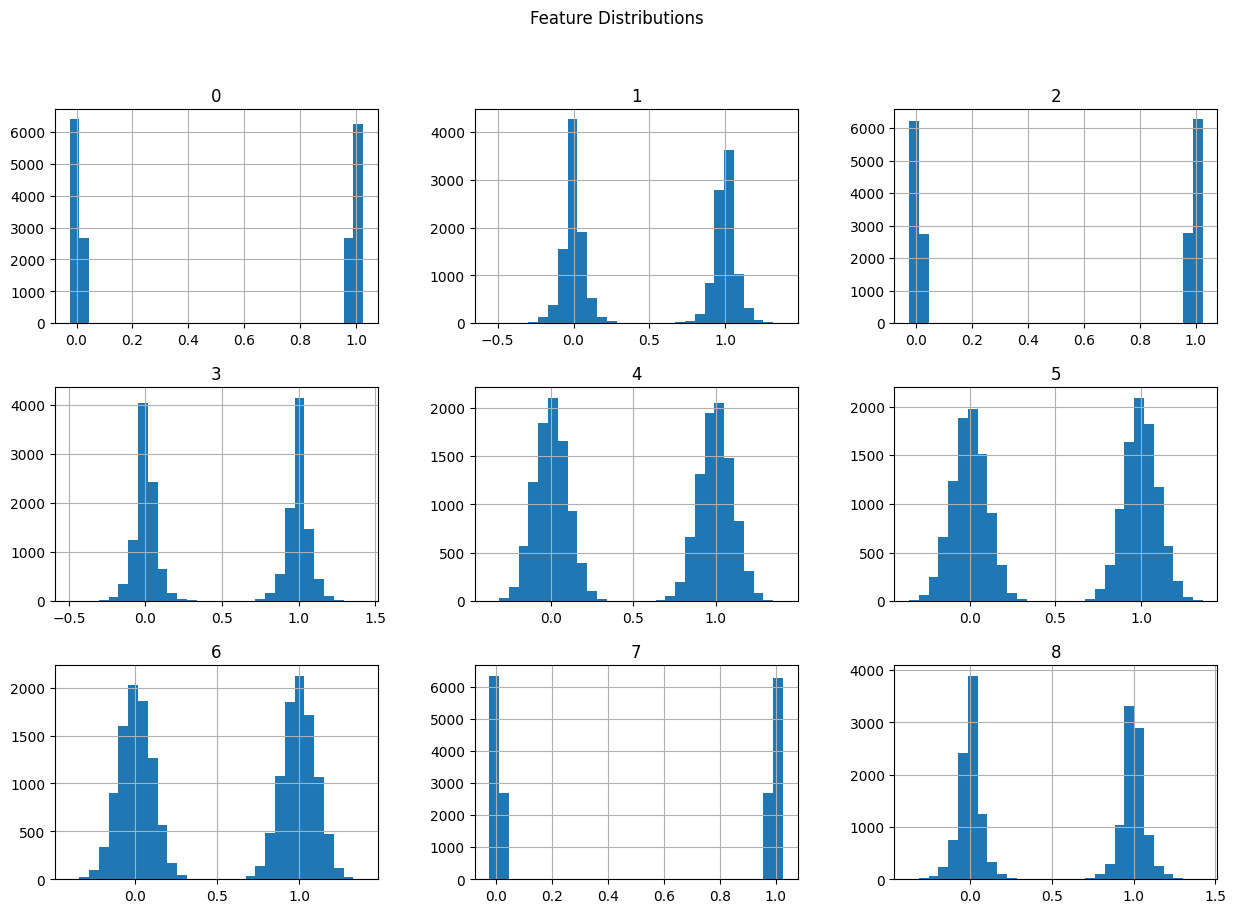

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
X_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-9-X.npy')
y_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-9-y.npy')  # Replace with actual path

# Convert to DataFrame for easier analysis
df_train = pd.DataFrame(X_train)

# Display descriptive statistics
print(df_train.describe())

# Plot histograms for each feature
df_train.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()


## Correlation Analysis

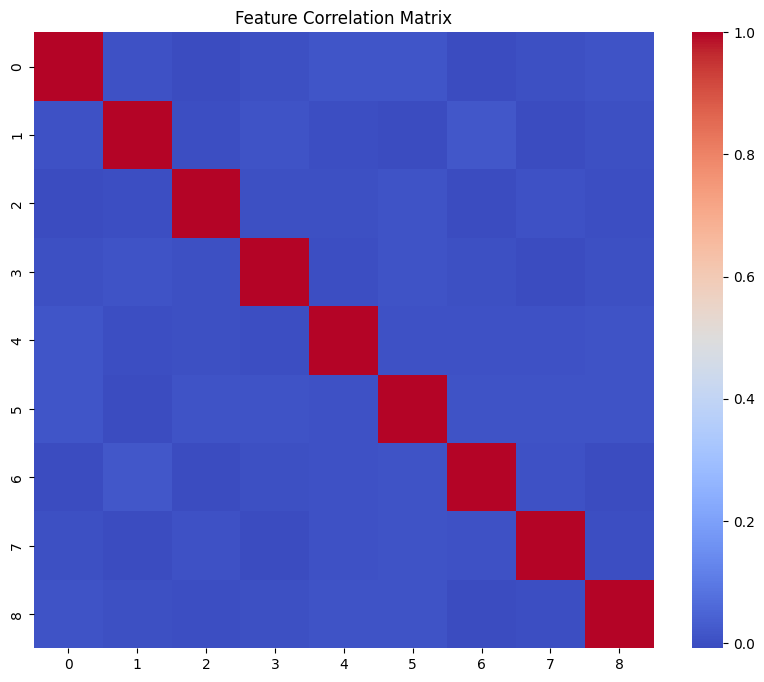

In [ ]:
# Calculate correlation matrix
correlation_matrix = df_train.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

## Dimensionality Reduction for Visualization

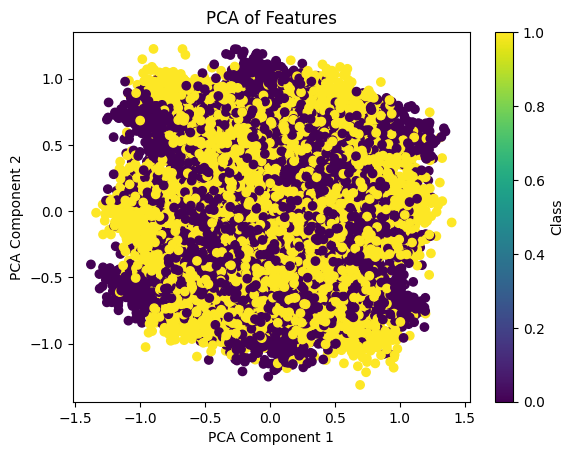

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA for initial dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Plot PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.title("PCA of Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Class")
plt.show()

# t-SNE for deeper visualization of structure
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
plt.title("t-SNE of Features")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Class")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


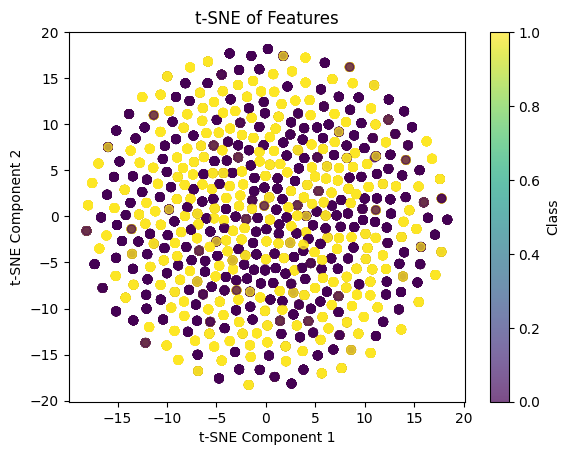

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_train)  # Adjust `X_train` if needed

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label="Class")
plt.title("t-SNE of Features")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


## Feature Interaction Analysis

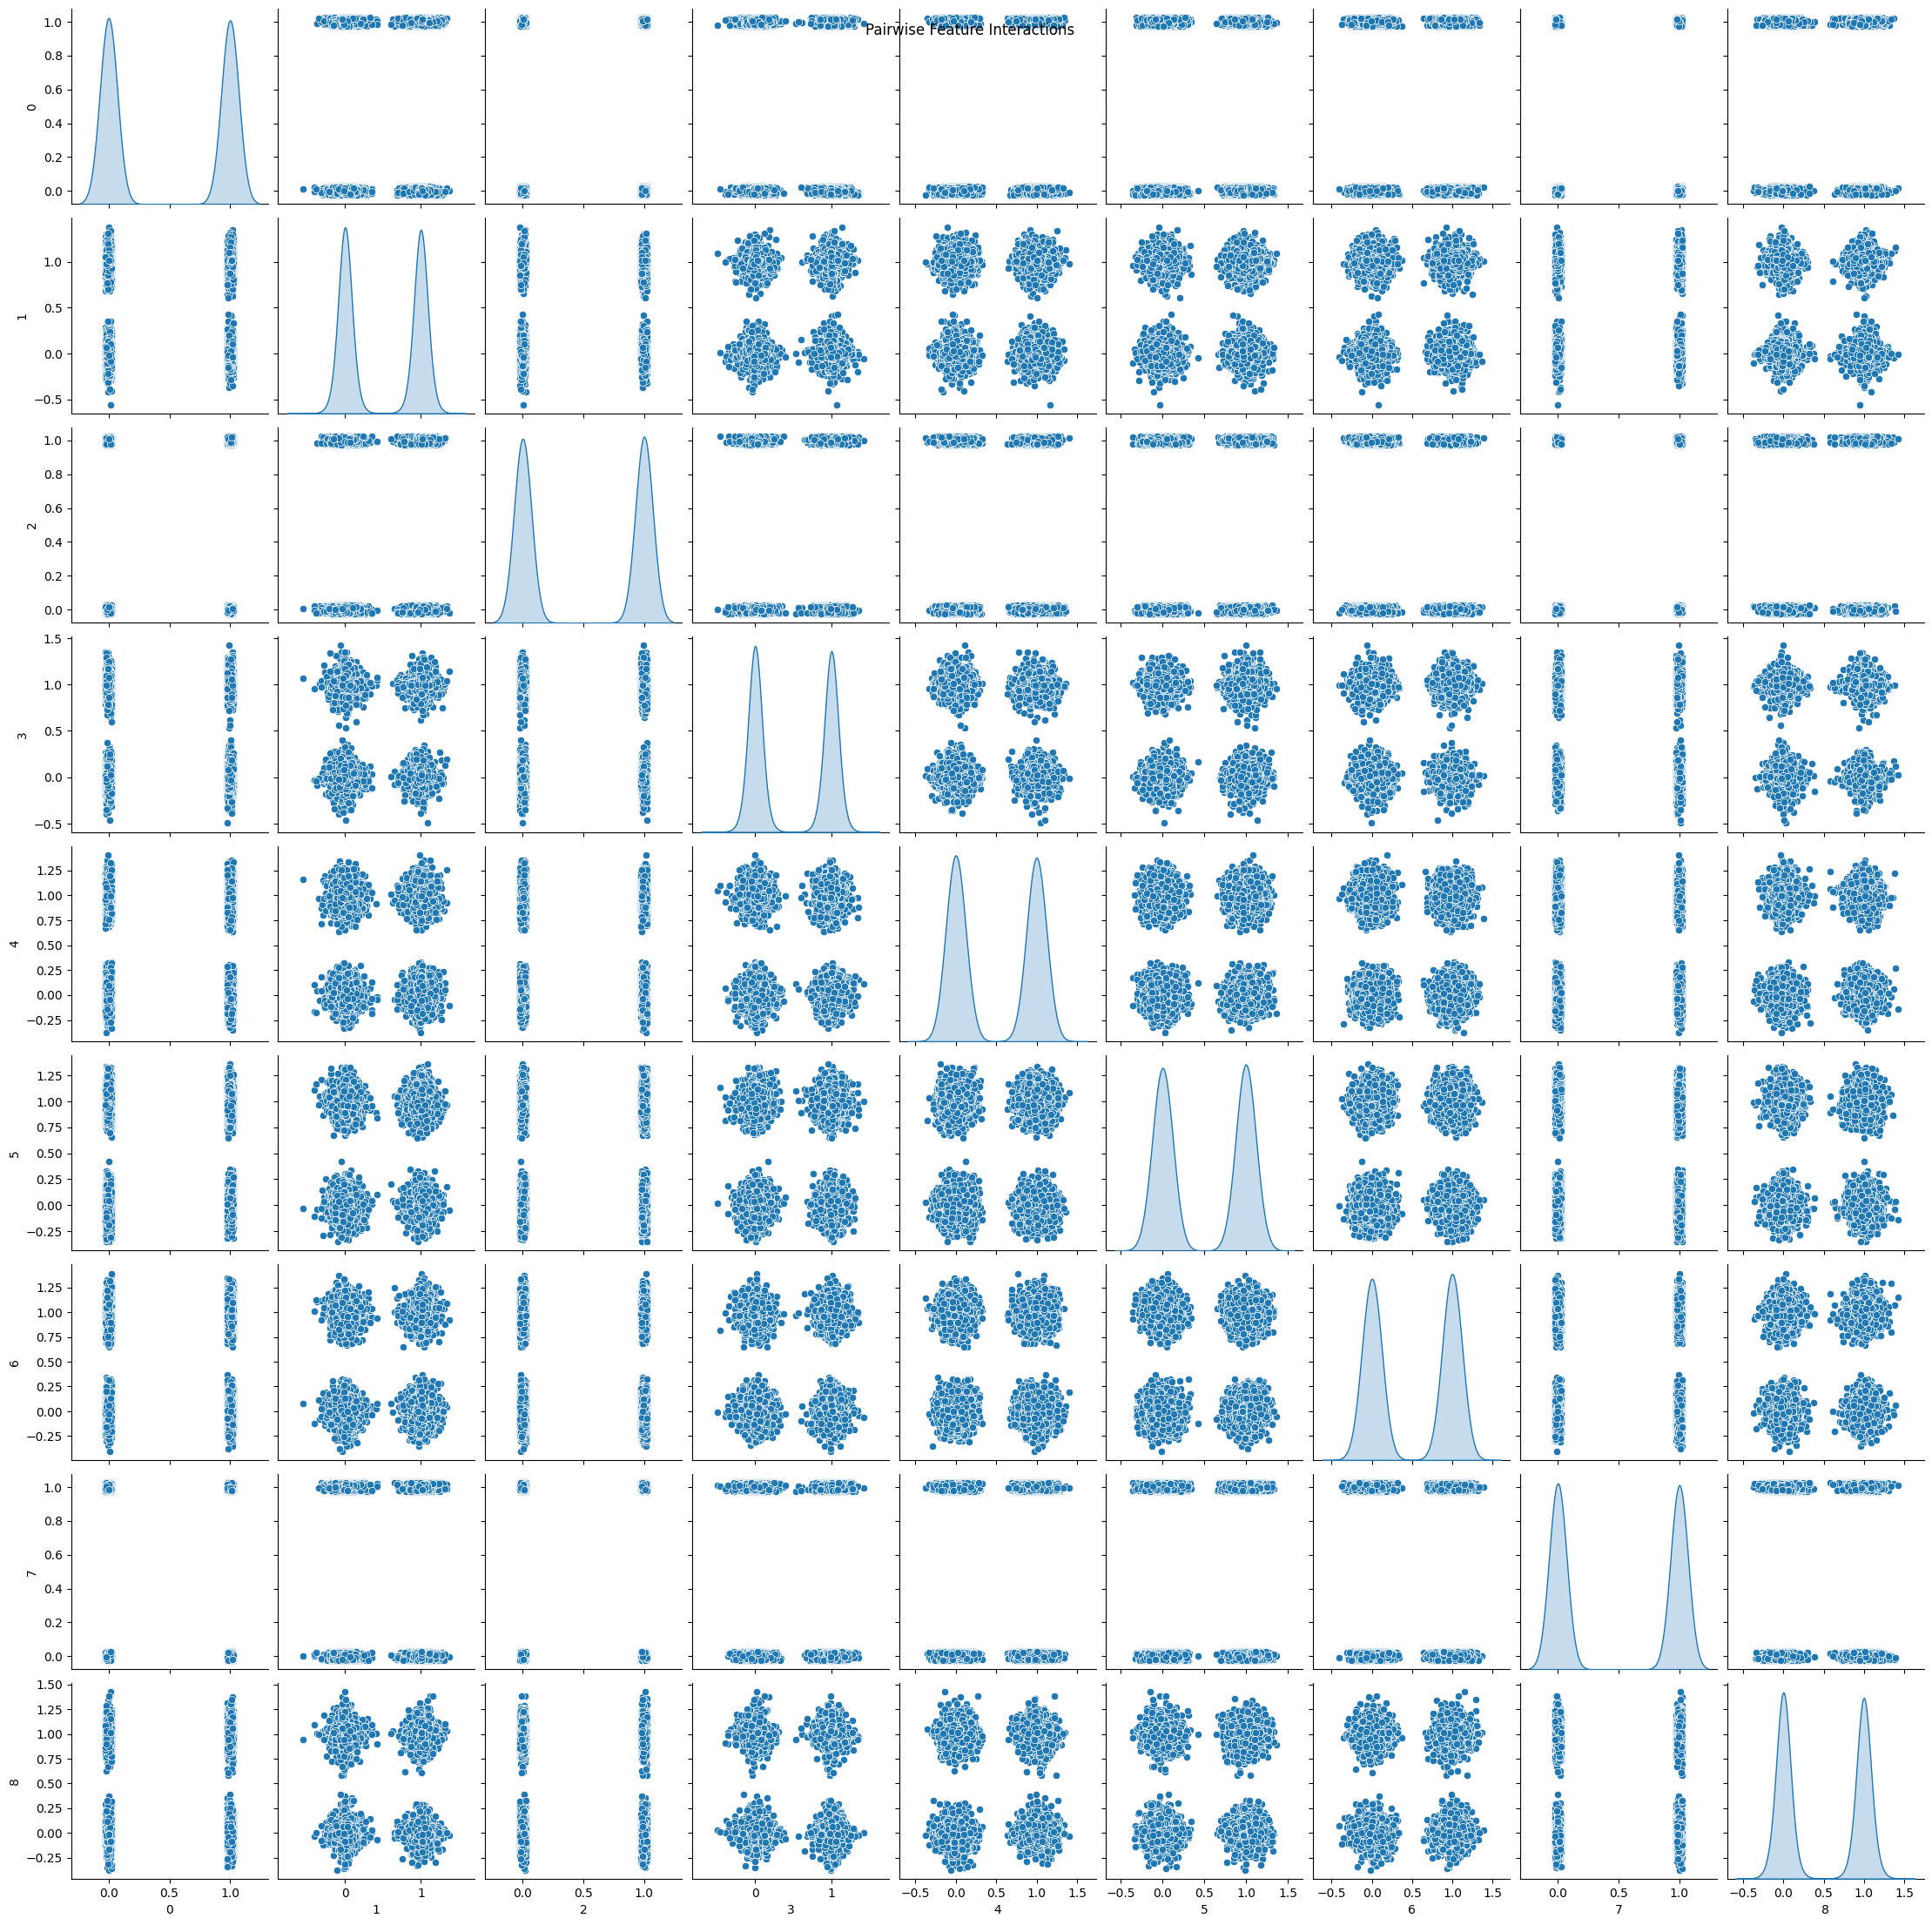

In [ ]:
# Select a subset of features to visualize pairwise interactions
sns.pairplot(df_train.iloc[:, :9], diag_kind='kde')  # Adjust the slice to select specific features
plt.suptitle("Pairwise Feature Interactions")
plt.show()


## Clustering Analysis for Structural Insights

Silhouette Score: 0.082458526


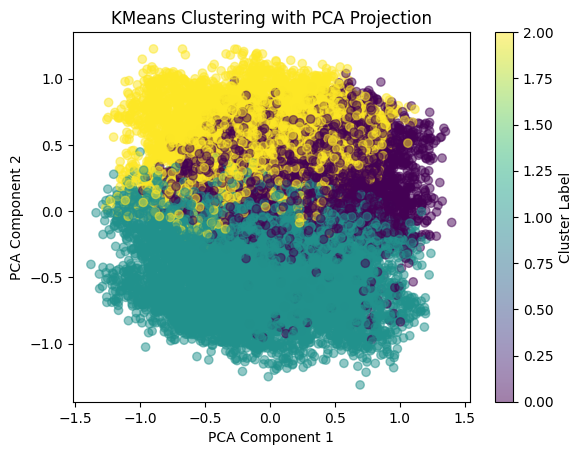

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train)

# Calculate silhouette score for cluster quality
sil_score = silhouette_score(X_train, kmeans_labels)
print("Silhouette Score:", sil_score)

# Visualize clustering result with PCA projection
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title("KMeans Clustering with PCA Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


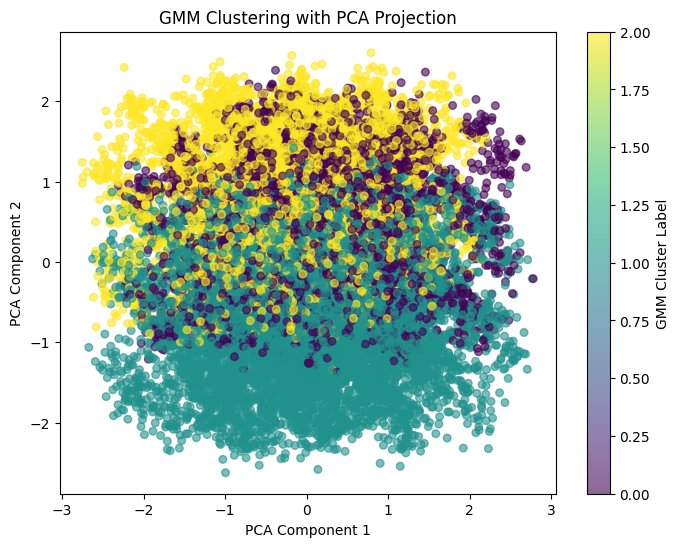

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Load and standardize the data
X_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-9-X.npy')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to reduce to two dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Fit the Gaussian Mixture Model with the chosen number of components
gmm = GaussianMixture(n_components=3, random_state=42)  # You can adjust n_components based on earlier analysis
gmm_labels = gmm.fit_predict(X_train_scaled)

# Plotting the GMM clusters with PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=30, alpha=0.6)
plt.colorbar(label="GMM Cluster Label")
plt.title("GMM Clustering with PCA Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## Check for Outliers or Anomalies

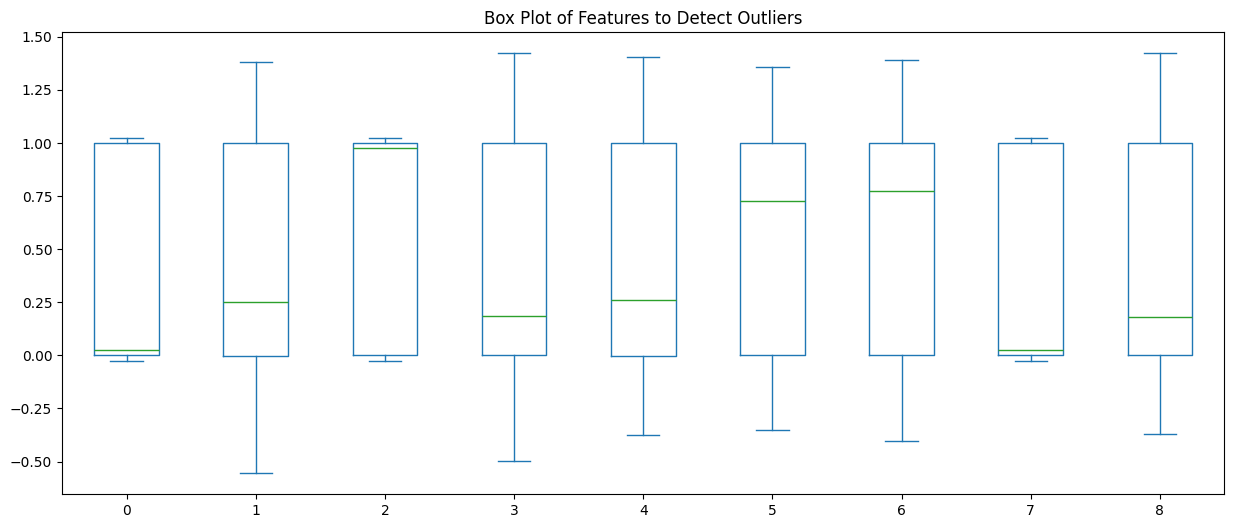

In [ ]:
# Box plot to identify outliers in each feature
df_train.plot(kind='box', figsize=(15, 6))
plt.title("Box Plot of Features to Detect Outliers")
plt.show()

## Random Forest

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans

# Step 1: Load Data
X_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-9-X.npy')
y_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-9-y.npy')
# Step 2: Add Cluster Labels as Features
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_train)
X_train_with_clusters = np.hstack((X_train, cluster_labels.reshape(-1, 1)))

# Step 3: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_train_with_clusters, y_train, test_size=0.2, random_state=42)

# Step 4: Set Up Gradient Boosting Model with Hyperparameter Tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}
xgb_model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Step 5: Best Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
print("Best Parameters:", grid_search.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Validation Accuracy: 0.5097222222222222
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1808
           1       0.51      0.53      0.52      1792

    accuracy                           0.51      3600
   macro avg       0.51      0.51      0.51      3600
weighted avg       0.51      0.51      0.51      3600



## Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Step 1: Load and prepare the data
X_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-9-X.npy')
y_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-9-y.npy')

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshaping for binary classification
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batch processing
train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

# Step 2: Define the Neural Network model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)  # Output layer for binary classification
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return self.sigmoid(x)

# Step 3: Instantiate the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = MLP(input_dim)
loss_fn = nn.BCELoss()  # Binary Cross Entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the model with checkpointing
num_epochs = 50
best_val_accuracy = 0.0  # Track the best validation accuracy

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation at the end of each epoch
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = loss_fn(val_outputs, y_val_tensor)
        val_preds = (val_outputs > 0.5).float()
        val_accuracy = accuracy_score(y_val_tensor, val_preds)

    # Print the progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Checkpoint: Save the model if it has the best validation accuracy so far
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"New best model saved with validation accuracy: {best_val_accuracy:.4f}")

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Step 5: Final evaluation and classification report
with torch.no_grad():
    val_preds = model(X_val_tensor)
    val_preds = (val_preds > 0.5).float()
    print("Best Model Classification Report:")
    print(classification_report(y_val_tensor, val_preds))
    print("Validation Accuracy of Best Model:", accuracy_score(y_val, val_preds))

Epoch [1/50], Loss: 0.6935, Val Loss: 0.6914, Val Accuracy: 0.5361
Epoch [2/50], Loss: 0.6814, Val Loss: 0.6485, Val Accuracy: 0.6403
Epoch [3/50], Loss: 0.6012, Val Loss: 0.4055, Val Accuracy: 0.8922
Epoch [4/50], Loss: 0.4140, Val Loss: 0.2367, Val Accuracy: 0.9389
Epoch [5/50], Loss: 0.3156, Val Loss: 0.1997, Val Accuracy: 0.9550
Epoch [6/50], Loss: 0.2663, Val Loss: 0.1881, Val Accuracy: 0.9564
Epoch [7/50], Loss: 0.2454, Val Loss: 0.1838, Val Accuracy: 0.9564
Epoch [8/50], Loss: 0.2302, Val Loss: 0.1819, Val Accuracy: 0.9561
Epoch [9/50], Loss: 0.2241, Val Loss: 0.1797, Val Accuracy: 0.9564
Epoch [10/50], Loss: 0.2179, Val Loss: 0.1795, Val Accuracy: 0.9564
Epoch [11/50], Loss: 0.2113, Val Loss: 0.1783, Val Accuracy: 0.9561
Epoch [12/50], Loss: 0.2077, Val Loss: 0.1793, Val Accuracy: 0.9564
Epoch [13/50], Loss: 0.2025, Val Loss: 0.1800, Val Accuracy: 0.9558
Epoch [14/50], Loss: 0.1981, Val Loss: 0.1763, Val Accuracy: 0.9569
Epoch [15/50], Loss: 0.1964, Val Loss: 0.1773, Val Accura

## Neural Network with Cluster Label Feature using KNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
import numpy as np

def train_using_k_means(dataset_number):
  # Split the data into training and validation sets

  X_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-X.npy'%(dataset_number))
  y_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-y.npy'%(dataset_number))
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

  # Normalize the data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_val_scaled = scaler.transform(X_val)

  # Step 2: Apply Clustering and Add Cluster Labels as Features
  # Fit KMeans clustering on the training data
  kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters based on earlier analysis
  train_clusters = kmeans.fit_predict(X_train_scaled)
  val_clusters = kmeans.predict(X_val_scaled)

  # Add the cluster labels as new features
  X_train_extended = np.hstack((X_train_scaled, train_clusters.reshape(-1, 1)))
  X_val_extended = np.hstack((X_val_scaled, val_clusters.reshape(-1, 1)))

  # Convert to PyTorch tensors
  X_train_tensor = torch.tensor(X_train_extended, dtype=torch.float32)
  X_val_tensor = torch.tensor(X_val_extended, dtype=torch.float32)
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshaping for binary classification
  y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

  # Create DataLoader for batch processing
  train_data = TensorDataset(X_train_tensor, y_train_tensor)
  val_data = TensorDataset(X_val_tensor, y_val_tensor)

  train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
  val_loader = DataLoader(val_data, batch_size=64)

  # Step 3: Define the Neural Network model
  class MLP(nn.Module):
      def __init__(self, input_dim):
          super(MLP, self).__init__()
          self.fc1 = nn.Linear(input_dim, 128)
          self.fc2 = nn.Linear(128, 64)
          self.fc3 = nn.Linear(64, 32)
          self.fc4 = nn.Linear(32, 1)  # Output layer for binary classification
          self.dropout = nn.Dropout(0.3)
          self.sigmoid = nn.Sigmoid()

      def forward(self, x):
          x = torch.relu(self.fc1(x))
          x = self.dropout(x)
          x = torch.relu(self.fc2(x))
          x = self.dropout(x)
          x = torch.relu(self.fc3(x))
          x = self.fc4(x)
          return self.sigmoid(x)

  # Step 4: Instantiate the model, loss function, and optimizer
  input_dim = X_train_extended.shape[1]  # Updated input dimension with the added cluster feature
  model = MLP(input_dim)
  loss_fn = nn.BCELoss()  # Binary Cross Entropy loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  # Step 5: Train the model with checkpointing
  num_epochs = 100
  best_val_accuracy = 0.0  # Track the best validation accuracy

  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0

      for inputs, labels in train_loader:
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = loss_fn(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

      # Validation at the end of each epoch
      model.eval()
      with torch.no_grad():
          val_outputs = model(X_val_tensor)
          val_loss = loss_fn(val_outputs, y_val_tensor)
          val_preds = (val_outputs > 0.5).float()
          val_accuracy = accuracy_score(y_val_tensor, val_preds)

      # Print the progress
      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}")

      # Checkpoint: Save the model if it has the best validation accuracy so far
      if val_accuracy > best_val_accuracy:
          best_val_accuracy = val_accuracy
          torch.save(model.state_dict(), 'best_model_%s_.pth'%(dataset_number))
          print(f"New best model saved with validation accuracy: {best_val_accuracy:.4f}")

  # Load the best model
  model.load_state_dict(torch.load('best_model_%s_.pth'%(dataset_number)))
  model.eval()

  # Step 6: Final evaluation and classification report
  with torch.no_grad():
      val_preds = model(X_val_tensor)
      val_preds = (val_preds > 0.5).float()
      print("Best Model Classification Report:")
      print(classification_report(y_val_tensor, val_preds))
      print("Validation Accuracy of Best Model:", accuracy_score(y_val, val_preds))

## Gaussian Mixture Models (GMM)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.mixture import BayesianGaussianMixture

def train_using_gmm(dataset_number):
  X_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-X.npy'%(dataset_number))
  y_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-y.npy'%(dataset_number))
  # Split the data into training and validation sets
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

  # Normalize the data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_val_scaled = scaler.transform(X_val)

  # Step 2: Apply GMM and Add Cluster Probabilities as Features
  # Fit Gaussian Mixture Model on the training data
  gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components based on earlier analysis
  # gmm = BayesianGaussianMixture(n_components=10, random_state=42)
  gmm.fit(X_train_scaled)

  # Get the probability distribution over clusters for each data point
  train_cluster_probs = gmm.predict_proba(X_train_scaled)
  val_cluster_probs = gmm.predict_proba(X_val_scaled)

  # Add the cluster probabilities as new features
  X_train_extended = np.hstack((X_train_scaled, train_cluster_probs))
  X_val_extended = np.hstack((X_val_scaled, val_cluster_probs))

  # Convert to PyTorch tensors
  X_train_tensor = torch.tensor(X_train_extended, dtype=torch.float32)
  X_val_tensor = torch.tensor(X_val_extended, dtype=torch.float32)
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshaping for binary classification
  y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

  # Create DataLoader for batch processing
  train_data = TensorDataset(X_train_tensor, y_train_tensor)
  val_data = TensorDataset(X_val_tensor, y_val_tensor)

  train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
  val_loader = DataLoader(val_data, batch_size=64)

  # Step 3: Define the Neural Network model
  class MLP(nn.Module):
      def __init__(self, input_dim):
          super(MLP, self).__init__()
          self.fc1 = nn.Linear(input_dim, 128)
          self.fc2 = nn.Linear(128, 64)
          self.fc3 = nn.Linear(64, 32)
          self.fc4 = nn.Linear(32, 1)  # Output layer for binary classification
          self.dropout = nn.Dropout(0.3)
          self.sigmoid = nn.Sigmoid()

      def forward(self, x):
          x = torch.relu(self.fc1(x))
          x = self.dropout(x)
          x = torch.relu(self.fc2(x))
          x = self.dropout(x)
          x = torch.relu(self.fc3(x))
          x = self.fc4(x)
          return self.sigmoid(x)

  # Step 4: Instantiate the model, loss function, and optimizer
  input_dim = X_train_extended.shape[1]  # Updated input dimension with the added GMM probability features
  model = MLP(input_dim)
  loss_fn = nn.BCELoss()  # Binary Cross Entropy loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  # Step 5: Train the model with checkpointing
  num_epochs = 100
  best_val_accuracy = 0.0  # Track the best validation accuracy

  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0

      for inputs, labels in train_loader:
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = loss_fn(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

      # Validation at the end of each epoch
      model.eval()
      with torch.no_grad():
          val_outputs = model(X_val_tensor)
          val_loss = loss_fn(val_outputs, y_val_tensor)
          val_preds = (val_outputs > 0.5).float()
          val_accuracy = accuracy_score(y_val_tensor, val_preds)

      # Print the progress
      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}")

      # Checkpoint: Save the model if it has the best validation accuracy so far
      if val_accuracy > best_val_accuracy:
          best_val_accuracy = val_accuracy
          torch.save(model.state_dict(), 'best_model_2_%s_.pth'%(dataset_number))
          print(f"New best model saved with validation accuracy: {best_val_accuracy:.4f}")

  # Load the best model
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))
  model.eval()

  # Step 6: Final evaluation and classification report
  with torch.no_grad():
      val_preds = model(X_val_tensor)
      val_preds = (val_preds > 0.5).float()
      print("Best Model Classification Report:")
      print(classification_report(y_val_tensor, val_preds))
      print("Validation Accuracy of Best Model:", accuracy_score(y_val, val_preds))

## Gaussian Mixture Models (GMM) with Malika

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.mixture import BayesianGaussianMixture

def train_using_gmm_malika(dataset_number):
  X_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-X.npy'%(dataset_number))
  y_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-y.npy'%(dataset_number))
  # Split the data into training and validation sets
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

  # Normalize the data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_val_scaled = scaler.transform(X_val)

  # Step 2: Apply GMM and Add Cluster Probabilities as Features
  # Fit Gaussian Mixture Model on the training data
  # gmm = GaussianMixture(n_components=4, random_state=42)  # Adjust n_components based on earlier analysis
  gmm = BayesianGaussianMixture(n_components=10, random_state=42)
  gmm.fit(X_train_scaled)

  # Get the probability distribution over clusters for each data point
  train_cluster_probs = gmm.predict_proba(X_train_scaled)
  val_cluster_probs = gmm.predict_proba(X_val_scaled)

  # Add the cluster probabilities as new features
  X_train_extended = np.hstack((X_train_scaled, train_cluster_probs))
  X_val_extended = np.hstack((X_val_scaled, val_cluster_probs))

  # Convert to PyTorch tensors
  X_train_tensor = torch.tensor(X_train_extended, dtype=torch.float32)
  X_val_tensor = torch.tensor(X_val_extended, dtype=torch.float32)
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshaping for binary classification
  y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

  # Create DataLoader for batch processing
  train_data = TensorDataset(X_train_tensor, y_train_tensor)
  val_data = TensorDataset(X_val_tensor, y_val_tensor)

  train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
  val_loader = DataLoader(val_data, batch_size=64)

  # Step 3: Define the Neural Network model
  class MLP(nn.Module):
      def __init__(self, input_dim):
          super(MLP, self).__init__()
          self.fc1 = nn.Linear(input_dim, 128)
          self.fc2 = nn.Linear(128, 64)
          self.fc3 = nn.Linear(64, 1)
          self.dropout = nn.Dropout(0.3)
          self.sigmoid = nn.Sigmoid()

      def forward(self, x):
          x = torch.relu(self.fc1(x))
          x = self.dropout(x)
          x = torch.relu(self.fc2(x))
          x = self.dropout(x)
          return self.sigmoid(self.fc3(x))

  # Step 4: Instantiate the model, loss function, and optimizer
  input_dim = X_train_extended.shape[1]  # Updated input dimension with the added GMM probability features
  model = MLP(input_dim)
  loss_fn = nn.BCELoss()  # Binary Cross Entropy loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  # Step 5: Train the model with checkpointing
  num_epochs = 100
  best_val_accuracy = 0.0  # Track the best validation accuracy

  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0

      for inputs, labels in train_loader:
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = loss_fn(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

      # Validation at the end of each epoch
      model.eval()
      with torch.no_grad():
          val_outputs = model(X_val_tensor)
          val_loss = loss_fn(val_outputs, y_val_tensor)
          val_preds = (val_outputs > 0.5).float()
          val_accuracy = accuracy_score(y_val_tensor, val_preds)

      # Print the progress
      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}")

      # Checkpoint: Save the model if it has the best validation accuracy so far
      if val_accuracy > best_val_accuracy:
          best_val_accuracy = val_accuracy
          torch.save(model.state_dict(), 'best_model_2_%s_.pth'%(dataset_number))
          print(f"New best model saved with validation accuracy: {best_val_accuracy:.4f}")

  # Load the best model
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))
  model.eval()

  # Step 6: Final evaluation and classification report
  with torch.no_grad():
      val_preds = model(X_val_tensor)
      val_preds = (val_preds > 0.5).float()
      print("Best Model Classification Report:")
      print(classification_report(y_val_tensor, val_preds))
      print("Validation Accuracy of Best Model:", accuracy_score(y_val, val_preds))

In [ ]:
# Example usage
train_using_gmm_malika(dataset_number=24)

Epoch [1/100], Loss: 0.6943, Val Loss: 0.6932, Val Accuracy: 0.5012
New best model saved with validation accuracy: 0.5012
Epoch [2/100], Loss: 0.6932, Val Loss: 0.6934, Val Accuracy: 0.4978
Epoch [3/100], Loss: 0.6928, Val Loss: 0.6939, Val Accuracy: 0.4974
Epoch [4/100], Loss: 0.6923, Val Loss: 0.6936, Val Accuracy: 0.4993
Epoch [5/100], Loss: 0.6919, Val Loss: 0.6941, Val Accuracy: 0.4950
Epoch [6/100], Loss: 0.6917, Val Loss: 0.6944, Val Accuracy: 0.4980
Epoch [7/100], Loss: 0.6911, Val Loss: 0.6940, Val Accuracy: 0.5035
New best model saved with validation accuracy: 0.5035
Epoch [8/100], Loss: 0.6901, Val Loss: 0.6947, Val Accuracy: 0.4998
Epoch [9/100], Loss: 0.6894, Val Loss: 0.6950, Val Accuracy: 0.5031
Epoch [10/100], Loss: 0.6889, Val Loss: 0.6959, Val Accuracy: 0.5028
Epoch [11/100], Loss: 0.6887, Val Loss: 0.6954, Val Accuracy: 0.5010
Epoch [12/100], Loss: 0.6880, Val Loss: 0.6960, Val Accuracy: 0.5039
New best model saved with validation accuracy: 0.5039
Epoch [13/100], Los

<ipython-input-19-583c3acf5ade>:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))


In [ ]:
train_using_gmm_malika(9)

Epoch [1/100], Loss: 0.6945, Val Loss: 0.6926, Val Accuracy: 0.5244
New best model saved with validation accuracy: 0.5244
Epoch [2/100], Loss: 0.6900, Val Loss: 0.6824, Val Accuracy: 0.5736
New best model saved with validation accuracy: 0.5736
Epoch [3/100], Loss: 0.6666, Val Loss: 0.6097, Val Accuracy: 0.7719
New best model saved with validation accuracy: 0.7719
Epoch [4/100], Loss: 0.5773, Val Loss: 0.4411, Val Accuracy: 0.8981
New best model saved with validation accuracy: 0.8981
Epoch [5/100], Loss: 0.4616, Val Loss: 0.3090, Val Accuracy: 0.9467
New best model saved with validation accuracy: 0.9467
Epoch [6/100], Loss: 0.3699, Val Loss: 0.2393, Val Accuracy: 0.9564
New best model saved with validation accuracy: 0.9564
Epoch [7/100], Loss: 0.3140, Val Loss: 0.2107, Val Accuracy: 0.9569
New best model saved with validation accuracy: 0.9569
Epoch [8/100], Loss: 0.2856, Val Loss: 0.2003, Val Accuracy: 0.9558
Epoch [9/100], Loss: 0.2718, Val Loss: 0.1930, Val Accuracy: 0.9564
Epoch [10/

<ipython-input-4-8bf9a648ed2c>:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))


In [ ]:
train_using_gmm_malika(12)

Epoch [1/100], Loss: 0.6943, Val Loss: 0.6936, Val Accuracy: 0.5004
New best model saved with validation accuracy: 0.5004
Epoch [2/100], Loss: 0.6928, Val Loss: 0.6931, Val Accuracy: 0.5092
New best model saved with validation accuracy: 0.5092
Epoch [3/100], Loss: 0.6920, Val Loss: 0.6932, Val Accuracy: 0.5035
Epoch [4/100], Loss: 0.6904, Val Loss: 0.6907, Val Accuracy: 0.5181
New best model saved with validation accuracy: 0.5181
Epoch [5/100], Loss: 0.6830, Val Loss: 0.6729, Val Accuracy: 0.6075
New best model saved with validation accuracy: 0.6075
Epoch [6/100], Loss: 0.6599, Val Loss: 0.6238, Val Accuracy: 0.7279
New best model saved with validation accuracy: 0.7279
Epoch [7/100], Loss: 0.6204, Val Loss: 0.5615, Val Accuracy: 0.7669
New best model saved with validation accuracy: 0.7669
Epoch [8/100], Loss: 0.5736, Val Loss: 0.4868, Val Accuracy: 0.8300
New best model saved with validation accuracy: 0.8300
Epoch [9/100], Loss: 0.5265, Val Loss: 0.4240, Val Accuracy: 0.8804
New best m

<ipython-input-9-81af967873b8>:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))


In [ ]:
train_using_gmm_malika(15)

Epoch [1/100], Loss: 0.6945, Val Loss: 0.6933, Val Accuracy: 0.5000
New best model saved with validation accuracy: 0.5000
Epoch [2/100], Loss: 0.6932, Val Loss: 0.6929, Val Accuracy: 0.5117
New best model saved with validation accuracy: 0.5117
Epoch [3/100], Loss: 0.6927, Val Loss: 0.6923, Val Accuracy: 0.5213
New best model saved with validation accuracy: 0.5213
Epoch [4/100], Loss: 0.6920, Val Loss: 0.6921, Val Accuracy: 0.5118
Epoch [5/100], Loss: 0.6903, Val Loss: 0.6885, Val Accuracy: 0.5505
New best model saved with validation accuracy: 0.5505
Epoch [6/100], Loss: 0.6861, Val Loss: 0.6811, Val Accuracy: 0.5785
New best model saved with validation accuracy: 0.5785
Epoch [7/100], Loss: 0.6784, Val Loss: 0.6670, Val Accuracy: 0.6077
New best model saved with validation accuracy: 0.6077
Epoch [8/100], Loss: 0.6674, Val Loss: 0.6444, Val Accuracy: 0.6428
New best model saved with validation accuracy: 0.6428
Epoch [9/100], Loss: 0.6544, Val Loss: 0.6195, Val Accuracy: 0.6843
New best m

<ipython-input-9-81af967873b8>:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))


In [ ]:
train_using_gmm_malika(18)

Epoch [1/100], Loss: 0.6945, Val Loss: 0.6937, Val Accuracy: 0.4940
New best model saved with validation accuracy: 0.4940
Epoch [2/100], Loss: 0.6933, Val Loss: 0.6932, Val Accuracy: 0.5036
New best model saved with validation accuracy: 0.5036
Epoch [3/100], Loss: 0.6929, Val Loss: 0.6938, Val Accuracy: 0.4978
Epoch [4/100], Loss: 0.6924, Val Loss: 0.6941, Val Accuracy: 0.4964
Epoch [5/100], Loss: 0.6923, Val Loss: 0.6944, Val Accuracy: 0.4944
Epoch [6/100], Loss: 0.6916, Val Loss: 0.6950, Val Accuracy: 0.4978
Epoch [7/100], Loss: 0.6916, Val Loss: 0.6950, Val Accuracy: 0.4939
Epoch [8/100], Loss: 0.6907, Val Loss: 0.6963, Val Accuracy: 0.4914
Epoch [9/100], Loss: 0.6903, Val Loss: 0.6949, Val Accuracy: 0.5033
Epoch [10/100], Loss: 0.6897, Val Loss: 0.6949, Val Accuracy: 0.5036
Epoch [11/100], Loss: 0.6889, Val Loss: 0.6948, Val Accuracy: 0.5085
New best model saved with validation accuracy: 0.5085
Epoch [12/100], Loss: 0.6877, Val Loss: 0.6954, Val Accuracy: 0.5049
Epoch [13/100], Los

<ipython-input-9-81af967873b8>:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))


In [ ]:
train_using_gmm_malika(45)

Epoch [1/100], Loss: 0.6938, Val Loss: 0.6931, Val Accuracy: 0.5047
New best model saved with validation accuracy: 0.5047
Epoch [2/100], Loss: 0.6930, Val Loss: 0.6933, Val Accuracy: 0.4997
Epoch [3/100], Loss: 0.6928, Val Loss: 0.6933, Val Accuracy: 0.5024
Epoch [4/100], Loss: 0.6923, Val Loss: 0.6939, Val Accuracy: 0.5025
Epoch [5/100], Loss: 0.6919, Val Loss: 0.6943, Val Accuracy: 0.4976
Epoch [6/100], Loss: 0.6913, Val Loss: 0.6940, Val Accuracy: 0.4972
Epoch [7/100], Loss: 0.6908, Val Loss: 0.6942, Val Accuracy: 0.4989
Epoch [8/100], Loss: 0.6898, Val Loss: 0.6952, Val Accuracy: 0.5009
Epoch [9/100], Loss: 0.6885, Val Loss: 0.6953, Val Accuracy: 0.4984
Epoch [10/100], Loss: 0.6878, Val Loss: 0.6961, Val Accuracy: 0.5032
Epoch [11/100], Loss: 0.6874, Val Loss: 0.6952, Val Accuracy: 0.5005
Epoch [12/100], Loss: 0.6864, Val Loss: 0.6963, Val Accuracy: 0.5018
Epoch [13/100], Loss: 0.6860, Val Loss: 0.6962, Val Accuracy: 0.4986
Epoch [14/100], Loss: 0.6852, Val Loss: 0.6965, Val Accura

<ipython-input-9-81af967873b8>:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))


## Malika Code with early stopping

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.mixture import BayesianGaussianMixture

def train_using_gmm_malika_early_stopping(dataset_number):
  # Load and preprocess data
  X = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-X.npy'%(dataset_number))
  y = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-y.npy'%(dataset_number))

  # Standardize the features
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Convert labels to PyTorch tensor
  y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshaped for binary classification

  # Define neural network architecture
  class BinaryClassificationModel(nn.Module):
      def __init__(self, input_dim):
          super(BinaryClassificationModel, self).__init__()
          self.fc1 = nn.Linear(input_dim, 128)
          self.fc2 = nn.Linear(128, 64)
          self.output = nn.Linear(64, 1)
          self.relu = nn.ReLU()
          self.sigmoid = nn.Sigmoid()

      def forward(self, x):
          x = self.relu(self.fc1(x))
          x = self.relu(self.fc2(x))
          x = self.sigmoid(self.output(x))
          return x

  # Cross-validation setup
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Hyperparameters
  learning_rate = 0.001
  num_epochs = 100
  batch_size = 64
  patience = 10

  # K-fold Cross-validation
  for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
      print(f"Fold {fold}")

      X_train, X_val = X_scaled[train_index], X_scaled[val_index]
      y_train, y_val = y[train_index], y[val_index]

      # Apply Bayesian Gaussian Mixture Model
      gmm = BayesianGaussianMixture(n_components=10, random_state=42)
      gmm.fit(X_train)

      # Get the probability distribution over clusters for each data point
      train_cluster_probs = gmm.predict_proba(X_train)
      val_cluster_probs = gmm.predict_proba(X_val)

      # Add the cluster probabilities as new features
      X_train_extended = np.hstack((X_train, train_cluster_probs))
      X_val_extended = np.hstack((X_val, val_cluster_probs))

      # Convert to PyTorch tensors
      X_train_tensor = torch.tensor(X_train_extended, dtype=torch.float32)
      X_val_tensor = torch.tensor(X_val_extended, dtype=torch.float32)
      y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
      y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

      # Create DataLoader for batch processing
      train_data = TensorDataset(X_train_tensor, y_train_tensor)
      val_data = TensorDataset(X_val_tensor, y_val_tensor)

      train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
      val_loader = DataLoader(val_data, batch_size=batch_size)

      # Create the model
      model = BinaryClassificationModel(input_dim=X_train_extended.shape[1])
      criterion = nn.BCELoss()  # Binary cross-entropy loss
      optimizer = optim.Adam(model.parameters(), lr=learning_rate)

      # Early stopping variables
      best_loss = float('inf')
      patience_counter = 0

      for epoch in range(num_epochs):
          model.train()

          for X_batch, y_batch in train_loader:
              # Forward pass
              outputs = model(X_batch).squeeze()
              loss = criterion(outputs, y_batch.squeeze())

              # Backward pass and optimization
              optimizer.zero_grad()
              loss.backward()
              optimizer.step()

          # Validation phase
          model.eval()
          val_losses = []
          with torch.no_grad():
              for X_batch, y_batch in val_loader:
                  val_outputs = model(X_batch).squeeze()
                  val_loss = criterion(val_outputs, y_batch.squeeze())
                  val_losses.append(val_loss.item())

          # Early stopping
          avg_val_loss = np.mean(val_losses)
          if avg_val_loss < best_loss:
              best_loss = avg_val_loss
              patience_counter = 0
              best_model_state = model.state_dict()
          else:
              patience_counter += 1

          if patience_counter >= patience:
              print("Early stopping triggered")
              break

      # Load best model state
      model.load_state_dict(best_model_state)

      # Evaluate on validation data
      model.eval()
      with torch.no_grad():
          y_val_pred = []
          for X_batch, _ in val_loader:
              predictions = (model(X_batch).squeeze() > 0.5).int()
              y_val_pred.extend(predictions.numpy())

      # Print full classification report
      print(classification_report(y_val, y_val_pred))
      print("="*80)

  # Optionally, evaluate on the full dataset after cross-validation
  gmm = BayesianGaussianMixture(n_components=10, random_state=42)
  gmm.fit(X_scaled)
  full_cluster_probs = gmm.predict_proba(X_scaled)
  X_full_extended = np.hstack((X_scaled, full_cluster_probs))

  X_full_tensor = torch.tensor(X_full_extended, dtype=torch.float32)
  y_full_tensor = y_tensor

  # Final training and evaluation on full dataset
  model = BinaryClassificationModel(input_dim=X_full_extended.shape[1])
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  for epoch in range(num_epochs):
      model.train()
      outputs = model(X_full_tensor).squeeze()
      loss = criterion(outputs, y_full_tensor.squeeze())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  # Evaluate on full dataset
  model.eval()
  with torch.no_grad():
      y_pred = (model(X_full_tensor).squeeze() > 0.5).int()

  print("Final Classification Report (Full Dataset):")
  print(classification_report(y_full_tensor.int().numpy(), y_pred.numpy()))


In [ ]:
train_using_gmm_malika_early_stopping(15)

Fold 1
Early stopping triggered
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3008
           1       0.90      0.95      0.92      2992

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000

Fold 2
Early stopping triggered
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3009
           1       0.91      0.96      0.93      2991

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

Fold 3
Early stopping triggered
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3024
           1       0.90      0.95      0.92      2976

    accuracy                           0.92      6000
   macro avg       0.92      0.9

###GPT improved version

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.mixture import BayesianGaussianMixture

def train_using_gmm_malika_early_stopping(dataset_number):
    # Load and preprocess data
    X = np.load(f'/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-{dataset_number}-X.npy')
    y = np.load(f'/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-{dataset_number}-y.npy')

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Convert labels to PyTorch tensor
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    # Define an enhanced neural network architecture
    class EnhancedBinaryClassificationModel(nn.Module):
        def __init__(self, input_dim):
            super(EnhancedBinaryClassificationModel, self).__init__()
            self.fc1 = nn.Linear(input_dim, 256)
            self.bn1 = nn.BatchNorm1d(256)
            self.fc2 = nn.Linear(256, 128)
            self.bn2 = nn.BatchNorm1d(128)
            self.fc3 = nn.Linear(128, 64)
            self.bn3 = nn.BatchNorm1d(64)
            self.output = nn.Linear(64, 1)
            self.dropout = nn.Dropout(0.3)
            self.leaky_relu = nn.LeakyReLU(0.1)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.leaky_relu(self.bn1(self.fc1(x)))
            x = self.dropout(x)
            x = self.leaky_relu(self.bn2(self.fc2(x)))
            x = self.dropout(x)
            x = self.leaky_relu(self.bn3(self.fc3(x)))
            x = self.dropout(x)
            x = self.sigmoid(self.output(x))
            return x

    # Cross-validation setup
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Hyperparameters
    learning_rate = 0.001
    num_epochs = 100
    batch_size = 64
    patience = 10

    # K-fold Cross-validation
    for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
        print(f"Fold {fold}")

        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Apply Bayesian Gaussian Mixture Model
        gmm = BayesianGaussianMixture(n_components=10, random_state=42)
        gmm.fit(X_train)

        # Get the probability distribution over clusters for each data point
        train_cluster_probs = gmm.predict_proba(X_train)
        val_cluster_probs = gmm.predict_proba(X_val)

        # Add the cluster probabilities as new features
        X_train_extended = np.hstack((X_train, train_cluster_probs))
        X_val_extended = np.hstack((X_val, val_cluster_probs))

        # Convert to PyTorch tensors
        X_train_tensor = torch.tensor(X_train_extended, dtype=torch.float32)
        X_val_tensor = torch.tensor(X_val_extended, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
        y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

        # Create DataLoader for batch processing
        train_data = TensorDataset(X_train_tensor, y_train_tensor)
        val_data = TensorDataset(X_val_tensor, y_val_tensor)
        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=batch_size)

        # Create the model
        model = EnhancedBinaryClassificationModel(input_dim=X_train_extended.shape[1])
        criterion = nn.BCELoss()
        optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)

        # Early stopping variables
        best_loss = float('inf')
        patience_counter = 0

        for epoch in range(num_epochs):
            model.train()

            for X_batch, y_batch in train_loader:
                # Forward pass
                outputs = model(X_batch).squeeze()
                loss = criterion(outputs, y_batch.squeeze())

                # Backward pass and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Validation phase
            model.eval()
            val_losses = []
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    val_outputs = model(X_batch).squeeze()
                    val_loss = criterion(val_outputs, y_batch.squeeze())
                    val_losses.append(val_loss.item())

            avg_val_loss = np.mean(val_losses)
            scheduler.step(avg_val_loss)

            # Early stopping
            if avg_val_loss < best_loss:
                best_loss = avg_val_loss
                patience_counter = 0
                best_model_state = model.state_dict()
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print("Early stopping triggered")
                break

        # Load best model state
        model.load_state_dict(best_model_state)

        # Evaluate on validation data
        model.eval()
        with torch.no_grad():
            y_val_pred = []
            for X_batch, _ in val_loader:
                predictions = (model(X_batch).squeeze() > 0.5).int()
                y_val_pred.extend(predictions.numpy())

        # Print full classification report
        print(classification_report(y_val, y_val_pred))
        print("="*80)

    # Optionally, evaluate on the full dataset after cross-validation
    gmm = BayesianGaussianMixture(n_components=10, random_state=42)
    gmm.fit(X_scaled)
    full_cluster_probs = gmm.predict_proba(X_scaled)
    X_full_extended = np.hstack((X_scaled, full_cluster_probs))

    X_full_tensor = torch.tensor(X_full_extended, dtype=torch.float32)
    y_full_tensor = y_tensor

    # Final training and evaluation on full dataset
    model = EnhancedBinaryClassificationModel(input_dim=X_full_extended.shape[1])
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_full_tensor).squeeze()
        loss = criterion(outputs, y_full_tensor.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate on full dataset
    model.eval()
    with torch.no_grad():
        y_pred = (model(X_full_tensor).squeeze() > 0.5).int()

    print("Final Classification Report (Full Dataset):")
    print(classification_report(y_full_tensor.int().numpy(), y_pred.numpy()))


In [ ]:
train_using_gmm_malika_early_stopping(12)

Fold 1
Early stopping triggered
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2396
           1       0.96      0.94      0.95      2404

    accuracy                           0.95      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.95      0.95      0.95      4800

Fold 2
Early stopping triggered
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2341
           1       0.96      0.95      0.96      2459

    accuracy                           0.95      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.95      0.95      0.95      4800

Fold 3
Early stopping triggered
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2350
           1       0.96      0.96      0.96      2450

    accuracy                           0.96      4800
   macro avg       0.96      0.9

In [ ]:
train_using_gmm_malika_early_stopping(24)

Fold 1


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Early stopping triggered
              precision    recall  f1-score   support

           0       0.49      0.53      0.51      4741
           1       0.51      0.47      0.49      4859

    accuracy                           0.50      9600
   macro avg       0.50      0.50      0.50      9600
weighted avg       0.50      0.50      0.50      9600

Fold 2


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Early stopping triggered
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      4818
           1       0.50      0.49      0.50      4782

    accuracy                           0.50      9600
   macro avg       0.50      0.50      0.50      9600
weighted avg       0.50      0.50      0.50      9600

Fold 3


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Early stopping triggered
              precision    recall  f1-score   support

           0       0.49      0.45      0.47      4800
           1       0.50      0.54      0.52      4800

    accuracy                           0.49      9600
   macro avg       0.49      0.49      0.49      9600
weighted avg       0.49      0.49      0.49      9600

Fold 4


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Early stopping triggered
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      4797
           1       0.51      0.51      0.51      4803

    accuracy                           0.51      9600
   macro avg       0.51      0.51      0.51      9600
weighted avg       0.51      0.51      0.51      9600

Fold 5


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Early stopping triggered
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      4765
           1       0.51      0.52      0.51      4835

    accuracy                           0.50      9600
   macro avg       0.50      0.50      0.50      9600
weighted avg       0.50      0.50      0.50      9600



KeyboardInterrupt: 

## Using feature interactions - not so helpful :(



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.mixture import GaussianMixture
import numpy as np

def load_and_prepare_data_with_interactions(dataset_number):
    # Load the dataset
    X_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-X.npy' % (dataset_number))
    y_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-y.npy' % (dataset_number))

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Create interaction terms
    X_train_interaction = np.hstack((X_train, (X_train[:, 3] * X_train[:, 4]).reshape(-1, 1)))
    X_val_interaction = np.hstack((X_val, (X_val[:, 3] * X_val[:, 4]).reshape(-1, 1)))

    # Normalize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_interaction)
    X_val_scaled = scaler.transform(X_val_interaction)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshaping for binary classification
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

    # Create DataLoader for batch processing
    train_data = TensorDataset(X_train_tensor, y_train_tensor)
    val_data = TensorDataset(X_val_tensor, y_val_tensor)

    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=64)
    class MLP(nn.Module):
      def __init__(self, input_dim):
          super(MLP, self).__init__()
          self.fc1 = nn.Linear(input_dim, 128)
          self.fc2 = nn.Linear(128, 64)
          self.fc3 = nn.Linear(64, 32)
          self.fc4 = nn.Linear(32, 1)  # Output layer for binary classification
          self.dropout = nn.Dropout(0.3)
          self.sigmoid = nn.Sigmoid()

      def forward(self, x):
          x = torch.relu(self.fc1(x))
          x = self.dropout(x)
          x = torch.relu(self.fc2(x))
          x = self.dropout(x)
          x = torch.relu(self.fc3(x))
          x = self.fc4(x)
          return self.sigmoid(x)

    # Step 4: Instantiate the model, loss function, and optimizer
    input_dim = X_train_tensor.shape[1] # Updated input dimension with the added GMM probability features
    model = MLP(input_dim)
    loss_fn = nn.BCELoss()  # Binary Cross Entropy loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Step 5: Train the model with checkpointing
    num_epochs = 100
    best_val_accuracy = 0.0  # Track the best validation accuracy

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation at the end of each epoch
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = loss_fn(val_outputs, y_val_tensor)
            val_preds = (val_outputs > 0.5).float()
            val_accuracy = accuracy_score(y_val_tensor, val_preds)

        # Print the progress
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Checkpoint: Save the model if it has the best validation accuracy so far
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), 'best_model_3_%s_.pth'%(dataset_number))
            print(f"New best model saved with validation accuracy: {best_val_accuracy:.4f}")

    # Load the best model
    model.load_state_dict(torch.load('best_model_3_%s_.pth'%(dataset_number)))
    model.eval()

    # Step 6: Final evaluation and classification report
    with torch.no_grad():
        val_preds = model(X_val_tensor)
        val_preds = (val_preds > 0.5).float()
        print("Best Model Classification Report:")
        print(classification_report(y_val_tensor, val_preds))
        print("Validation Accuracy of Best Model:", accuracy_score(y_val, val_preds))



## Gradient Boosting with gmm (awful)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import GradientBoostingClassifier
# Optionally, you could also import RandomForestClassifier if you want to try that as well
# from sklearn.ensemble import RandomForestClassifier

def train_using_gmm_and_gb(dataset_number):
    # Load the dataset
    X_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-X.npy' % (dataset_number))
    y_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-%s-y.npy' % (dataset_number))

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Normalize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Step 2: Apply GMM and Add Cluster Probabilities as Features
    gmm = GaussianMixture(n_components=3, random_state=42)
    gmm.fit(X_train_scaled)
    train_cluster_probs = gmm.predict_proba(X_train_scaled)
    val_cluster_probs = gmm.predict_proba(X_val_scaled)

    # Add the cluster probabilities as new features
    X_train_extended = np.hstack((X_train_scaled, train_cluster_probs))
    X_val_extended = np.hstack((X_val_scaled, val_cluster_probs))

    # Step 3: Define the Gradient Boosting model (or Random Forest)
    # You can replace GradientBoostingClassifier with RandomForestClassifier if you want to use Random Forest instead
    model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.09, max_depth=3, random_state=42)
    # model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

    # Step 4: Train the model
    model.fit(X_train_extended, y_train)

    # Step 5: Evaluate on validation data
    val_preds = model.predict(X_val_extended)
    val_accuracy = accuracy_score(y_val, val_preds)

    # Print the classification report and validation accuracy
    print("Validation Accuracy:", val_accuracy)
    print("Classification Report:")
    print(classification_report(y_val, val_preds))

    # Save the model if needed
    # from joblib import dump
    # dump(model, 'best_gradient_boosting_model.joblib')  # Or 'best_random_forest_model.joblib' if using Random Forest
train_using_gmm_and_gb(9)

Validation Accuracy: 0.5094444444444445
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1808
           1       0.51      0.52      0.52      1792

    accuracy                           0.51      3600
   macro avg       0.51      0.51      0.51      3600
weighted avg       0.51      0.51      0.51      3600



##Testing

In [ ]:
train_using_k_means(9)

Epoch [1/100], Loss: 0.6931, Val Loss: 0.6928, Val Accuracy: 0.4933
New best model saved with validation accuracy: 0.4933
Epoch [2/100], Loss: 0.6865, Val Loss: 0.6626, Val Accuracy: 0.6183
New best model saved with validation accuracy: 0.6183
Epoch [3/100], Loss: 0.5871, Val Loss: 0.3979, Val Accuracy: 0.9025
New best model saved with validation accuracy: 0.9025
Epoch [4/100], Loss: 0.4232, Val Loss: 0.2443, Val Accuracy: 0.9522
New best model saved with validation accuracy: 0.9522
Epoch [5/100], Loss: 0.3238, Val Loss: 0.1946, Val Accuracy: 0.9567
New best model saved with validation accuracy: 0.9567
Epoch [6/100], Loss: 0.2717, Val Loss: 0.1844, Val Accuracy: 0.9569
New best model saved with validation accuracy: 0.9569
Epoch [7/100], Loss: 0.2460, Val Loss: 0.1806, Val Accuracy: 0.9569
Epoch [8/100], Loss: 0.2346, Val Loss: 0.1800, Val Accuracy: 0.9564
Epoch [9/100], Loss: 0.2233, Val Loss: 0.1803, Val Accuracy: 0.9567
Epoch [10/100], Loss: 0.2175, Val Loss: 0.1803, Val Accuracy: 0.

<ipython-input-1-adb2c548e64d>:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_%s_.pth'%(dataset_number)))


In [ ]:
train_using_gmm(9)

Epoch [1/100], Loss: 0.6936, Val Loss: 0.6921, Val Accuracy: 0.5311
New best model saved with validation accuracy: 0.5311
Epoch [2/100], Loss: 0.6828, Val Loss: 0.6464, Val Accuracy: 0.6353
New best model saved with validation accuracy: 0.6353
Epoch [3/100], Loss: 0.5786, Val Loss: 0.3832, Val Accuracy: 0.8861
New best model saved with validation accuracy: 0.8861
Epoch [4/100], Loss: 0.4191, Val Loss: 0.2592, Val Accuracy: 0.9256
New best model saved with validation accuracy: 0.9256
Epoch [5/100], Loss: 0.3378, Val Loss: 0.2207, Val Accuracy: 0.9381
New best model saved with validation accuracy: 0.9381
Epoch [6/100], Loss: 0.2936, Val Loss: 0.2023, Val Accuracy: 0.9550
New best model saved with validation accuracy: 0.9550
Epoch [7/100], Loss: 0.2631, Val Loss: 0.1916, Val Accuracy: 0.9564
New best model saved with validation accuracy: 0.9564
Epoch [8/100], Loss: 0.2521, Val Loss: 0.1899, Val Accuracy: 0.9564
Epoch [9/100], Loss: 0.2390, Val Loss: 0.1851, Val Accuracy: 0.9567
New best m

<ipython-input-2-0f9ee21e8f0e>:109: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))


In [ ]:
load_and_prepare_data_with_interactions(9)

Epoch [1/100], Loss: 0.6933, Val Loss: 0.6918, Val Accuracy: 0.5044
New best model saved with validation accuracy: 0.5044
Epoch [2/100], Loss: 0.6850, Val Loss: 0.6524, Val Accuracy: 0.6794
New best model saved with validation accuracy: 0.6794
Epoch [3/100], Loss: 0.6057, Val Loss: 0.4417, Val Accuracy: 0.8772
New best model saved with validation accuracy: 0.8772
Epoch [4/100], Loss: 0.4379, Val Loss: 0.2659, Val Accuracy: 0.9364
New best model saved with validation accuracy: 0.9364
Epoch [5/100], Loss: 0.3359, Val Loss: 0.2242, Val Accuracy: 0.9528
New best model saved with validation accuracy: 0.9528
Epoch [6/100], Loss: 0.2880, Val Loss: 0.1990, Val Accuracy: 0.9569
New best model saved with validation accuracy: 0.9569
Epoch [7/100], Loss: 0.2614, Val Loss: 0.1899, Val Accuracy: 0.9572
New best model saved with validation accuracy: 0.9572
Epoch [8/100], Loss: 0.2437, Val Loss: 0.1872, Val Accuracy: 0.9561
Epoch [9/100], Loss: 0.2318, Val Loss: 0.1829, Val Accuracy: 0.9572
Epoch [10/

<ipython-input-3-ea78f443901f>:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_3_%s_.pth'%(dataset_number)))


In [ ]:
train_using_k_means(12)

Epoch [1/100], Loss: 0.6936, Val Loss: 0.6941, Val Accuracy: 0.4998
New best model saved with validation accuracy: 0.4998
Epoch [2/100], Loss: 0.6932, Val Loss: 0.6934, Val Accuracy: 0.5067
New best model saved with validation accuracy: 0.5067
Epoch [3/100], Loss: 0.6931, Val Loss: 0.6931, Val Accuracy: 0.5127
New best model saved with validation accuracy: 0.5127
Epoch [4/100], Loss: 0.6913, Val Loss: 0.6905, Val Accuracy: 0.5304
New best model saved with validation accuracy: 0.5304
Epoch [5/100], Loss: 0.6853, Val Loss: 0.6725, Val Accuracy: 0.6046
New best model saved with validation accuracy: 0.6046
Epoch [6/100], Loss: 0.6590, Val Loss: 0.6040, Val Accuracy: 0.7194
New best model saved with validation accuracy: 0.7194
Epoch [7/100], Loss: 0.6070, Val Loss: 0.5206, Val Accuracy: 0.7600
New best model saved with validation accuracy: 0.7600
Epoch [8/100], Loss: 0.5530, Val Loss: 0.4491, Val Accuracy: 0.8198
New best model saved with validation accuracy: 0.8198
Epoch [9/100], Loss: 0.4

<ipython-input-1-adb2c548e64d>:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_%s_.pth'%(dataset_number)))


In [ ]:
train_using_gmm(12)

Epoch [1/100], Loss: 0.6935, Val Loss: 0.6932, Val Accuracy: 0.5027
New best model saved with validation accuracy: 0.5027
Epoch [2/100], Loss: 0.6930, Val Loss: 0.6932, Val Accuracy: 0.5000
Epoch [3/100], Loss: 0.6925, Val Loss: 0.6918, Val Accuracy: 0.5129
New best model saved with validation accuracy: 0.5129
Epoch [4/100], Loss: 0.6878, Val Loss: 0.6774, Val Accuracy: 0.5996
New best model saved with validation accuracy: 0.5996
Epoch [5/100], Loss: 0.6670, Val Loss: 0.6213, Val Accuracy: 0.6608
New best model saved with validation accuracy: 0.6608
Epoch [6/100], Loss: 0.6101, Val Loss: 0.5092, Val Accuracy: 0.7842
New best model saved with validation accuracy: 0.7842
Epoch [7/100], Loss: 0.5475, Val Loss: 0.4370, Val Accuracy: 0.8473
New best model saved with validation accuracy: 0.8473
Epoch [8/100], Loss: 0.4937, Val Loss: 0.3622, Val Accuracy: 0.8858
New best model saved with validation accuracy: 0.8858
Epoch [9/100], Loss: 0.4470, Val Loss: 0.3204, Val Accuracy: 0.9146
New best m

<ipython-input-2-0f9ee21e8f0e>:109: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))


In [ ]:
train_using_k_means(15)

Epoch [1/100], Loss: 0.6937, Val Loss: 0.6932, Val Accuracy: 0.5040
New best model saved with validation accuracy: 0.5040
Epoch [2/100], Loss: 0.6934, Val Loss: 0.6930, Val Accuracy: 0.5123
New best model saved with validation accuracy: 0.5123
Epoch [3/100], Loss: 0.6930, Val Loss: 0.6930, Val Accuracy: 0.5068
Epoch [4/100], Loss: 0.6930, Val Loss: 0.6930, Val Accuracy: 0.5132
New best model saved with validation accuracy: 0.5132
Epoch [5/100], Loss: 0.6926, Val Loss: 0.6926, Val Accuracy: 0.5147
New best model saved with validation accuracy: 0.5147
Epoch [6/100], Loss: 0.6921, Val Loss: 0.6927, Val Accuracy: 0.5145
Epoch [7/100], Loss: 0.6904, Val Loss: 0.6915, Val Accuracy: 0.5212
New best model saved with validation accuracy: 0.5212
Epoch [8/100], Loss: 0.6891, Val Loss: 0.6885, Val Accuracy: 0.5325
New best model saved with validation accuracy: 0.5325
Epoch [9/100], Loss: 0.6839, Val Loss: 0.6772, Val Accuracy: 0.5802
New best model saved with validation accuracy: 0.5802
Epoch [10/

<ipython-input-1-adb2c548e64d>:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_%s_.pth'%(dataset_number)))


In [ ]:
train_using_gmm(15)

Epoch [1/100], Loss: 0.6937, Val Loss: 0.6931, Val Accuracy: 0.5008
New best model saved with validation accuracy: 0.5008
Epoch [2/100], Loss: 0.6933, Val Loss: 0.6928, Val Accuracy: 0.5163
New best model saved with validation accuracy: 0.5163
Epoch [3/100], Loss: 0.6929, Val Loss: 0.6918, Val Accuracy: 0.5280
New best model saved with validation accuracy: 0.5280
Epoch [4/100], Loss: 0.6913, Val Loss: 0.6889, Val Accuracy: 0.5487
New best model saved with validation accuracy: 0.5487
Epoch [5/100], Loss: 0.6874, Val Loss: 0.6780, Val Accuracy: 0.5865
New best model saved with validation accuracy: 0.5865
Epoch [6/100], Loss: 0.6752, Val Loss: 0.6532, Val Accuracy: 0.5857
Epoch [7/100], Loss: 0.6401, Val Loss: 0.6063, Val Accuracy: 0.6237
New best model saved with validation accuracy: 0.6237
Epoch [8/100], Loss: 0.5947, Val Loss: 0.5717, Val Accuracy: 0.6673
New best model saved with validation accuracy: 0.6673
Epoch [9/100], Loss: 0.5526, Val Loss: 0.5274, Val Accuracy: 0.7208
New best m

<ipython-input-2-0f9ee21e8f0e>:109: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))


In [ ]:
train_using_k_means(18)

Epoch [1/100], Loss: 0.6936, Val Loss: 0.6932, Val Accuracy: 0.4919
New best model saved with validation accuracy: 0.4919
Epoch [2/100], Loss: 0.6930, Val Loss: 0.6940, Val Accuracy: 0.4982
New best model saved with validation accuracy: 0.4982
Epoch [3/100], Loss: 0.6930, Val Loss: 0.6934, Val Accuracy: 0.4972
Epoch [4/100], Loss: 0.6926, Val Loss: 0.6934, Val Accuracy: 0.5075
New best model saved with validation accuracy: 0.5075
Epoch [5/100], Loss: 0.6924, Val Loss: 0.6934, Val Accuracy: 0.5061
Epoch [6/100], Loss: 0.6921, Val Loss: 0.6936, Val Accuracy: 0.5003
Epoch [7/100], Loss: 0.6917, Val Loss: 0.6949, Val Accuracy: 0.4972
Epoch [8/100], Loss: 0.6914, Val Loss: 0.6949, Val Accuracy: 0.4976
Epoch [9/100], Loss: 0.6910, Val Loss: 0.6946, Val Accuracy: 0.4949
Epoch [10/100], Loss: 0.6905, Val Loss: 0.6950, Val Accuracy: 0.4964
Epoch [11/100], Loss: 0.6897, Val Loss: 0.6945, Val Accuracy: 0.4940
Epoch [12/100], Loss: 0.6894, Val Loss: 0.6946, Val Accuracy: 0.4993
Epoch [13/100], Los

<ipython-input-1-adb2c548e64d>:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_%s_.pth'%(dataset_number)))


In [ ]:
train_using_gmm(18)

Epoch [1/100], Loss: 0.6935, Val Loss: 0.6932, Val Accuracy: 0.5032
New best model saved with validation accuracy: 0.5032
Epoch [2/100], Loss: 0.6931, Val Loss: 0.6936, Val Accuracy: 0.5038
New best model saved with validation accuracy: 0.5038
Epoch [3/100], Loss: 0.6927, Val Loss: 0.6933, Val Accuracy: 0.4997
Epoch [4/100], Loss: 0.6927, Val Loss: 0.6937, Val Accuracy: 0.5003
Epoch [5/100], Loss: 0.6924, Val Loss: 0.6938, Val Accuracy: 0.5018
Epoch [6/100], Loss: 0.6921, Val Loss: 0.6938, Val Accuracy: 0.5046
New best model saved with validation accuracy: 0.5046
Epoch [7/100], Loss: 0.6919, Val Loss: 0.6946, Val Accuracy: 0.4975
Epoch [8/100], Loss: 0.6912, Val Loss: 0.6940, Val Accuracy: 0.4978
Epoch [9/100], Loss: 0.6907, Val Loss: 0.6948, Val Accuracy: 0.5028
Epoch [10/100], Loss: 0.6900, Val Loss: 0.6956, Val Accuracy: 0.4958
Epoch [11/100], Loss: 0.6905, Val Loss: 0.6951, Val Accuracy: 0.4944
Epoch [12/100], Loss: 0.6897, Val Loss: 0.6951, Val Accuracy: 0.4975
Epoch [13/100], Los

<ipython-input-2-0f9ee21e8f0e>:109: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))


In [ ]:
train_using_k_means(24)

Epoch [1/100], Loss: 0.6939, Val Loss: 0.6931, Val Accuracy: 0.5018
New best model saved with validation accuracy: 0.5018
Epoch [2/100], Loss: 0.6932, Val Loss: 0.6931, Val Accuracy: 0.5095
New best model saved with validation accuracy: 0.5095
Epoch [3/100], Loss: 0.6929, Val Loss: 0.6937, Val Accuracy: 0.4971
Epoch [4/100], Loss: 0.6927, Val Loss: 0.6940, Val Accuracy: 0.5138
New best model saved with validation accuracy: 0.5138
Epoch [5/100], Loss: 0.6923, Val Loss: 0.6941, Val Accuracy: 0.4955
Epoch [6/100], Loss: 0.6922, Val Loss: 0.6937, Val Accuracy: 0.4940
Epoch [7/100], Loss: 0.6916, Val Loss: 0.6940, Val Accuracy: 0.4994
Epoch [8/100], Loss: 0.6913, Val Loss: 0.6941, Val Accuracy: 0.5009
Epoch [9/100], Loss: 0.6904, Val Loss: 0.6956, Val Accuracy: 0.4950
Epoch [10/100], Loss: 0.6903, Val Loss: 0.6946, Val Accuracy: 0.5005
Epoch [11/100], Loss: 0.6900, Val Loss: 0.6949, Val Accuracy: 0.4982
Epoch [12/100], Loss: 0.6899, Val Loss: 0.6955, Val Accuracy: 0.4980
Epoch [13/100], Los

<ipython-input-1-adb2c548e64d>:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_%s_.pth'%(dataset_number)))


In [ ]:
train_using_gmm(24)

Epoch [1/100], Loss: 0.6935, Val Loss: 0.6930, Val Accuracy: 0.5076
New best model saved with validation accuracy: 0.5076
Epoch [2/100], Loss: 0.6932, Val Loss: 0.6930, Val Accuracy: 0.5050
Epoch [3/100], Loss: 0.6931, Val Loss: 0.6934, Val Accuracy: 0.4951
Epoch [4/100], Loss: 0.6927, Val Loss: 0.6936, Val Accuracy: 0.5039
Epoch [5/100], Loss: 0.6928, Val Loss: 0.6933, Val Accuracy: 0.5078
New best model saved with validation accuracy: 0.5078
Epoch [6/100], Loss: 0.6924, Val Loss: 0.6934, Val Accuracy: 0.5049
Epoch [7/100], Loss: 0.6922, Val Loss: 0.6934, Val Accuracy: 0.5052
Epoch [8/100], Loss: 0.6921, Val Loss: 0.6935, Val Accuracy: 0.4977
Epoch [9/100], Loss: 0.6915, Val Loss: 0.6938, Val Accuracy: 0.5096
New best model saved with validation accuracy: 0.5096
Epoch [10/100], Loss: 0.6912, Val Loss: 0.6944, Val Accuracy: 0.5053
Epoch [11/100], Loss: 0.6901, Val Loss: 0.6945, Val Accuracy: 0.4954
Epoch [12/100], Loss: 0.6902, Val Loss: 0.6944, Val Accuracy: 0.5034
Epoch [13/100], Los

<ipython-input-2-0f9ee21e8f0e>:109: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_2_%s_.pth'%(dataset_number)))


In [ ]:
train_using_k_means(45)

Epoch [1/100], Loss: 0.6936, Val Loss: 0.6934, Val Accuracy: 0.5032
New best model saved with validation accuracy: 0.5032
Epoch [2/100], Loss: 0.6931, Val Loss: 0.6933, Val Accuracy: 0.4992
Epoch [3/100], Loss: 0.6929, Val Loss: 0.6933, Val Accuracy: 0.5002
Epoch [4/100], Loss: 0.6925, Val Loss: 0.6949, Val Accuracy: 0.4982
Epoch [5/100], Loss: 0.6921, Val Loss: 0.6941, Val Accuracy: 0.5032
Epoch [6/100], Loss: 0.6915, Val Loss: 0.6942, Val Accuracy: 0.4999
Epoch [7/100], Loss: 0.6911, Val Loss: 0.6945, Val Accuracy: 0.4986
Epoch [8/100], Loss: 0.6906, Val Loss: 0.6955, Val Accuracy: 0.5009
Epoch [9/100], Loss: 0.6898, Val Loss: 0.6948, Val Accuracy: 0.5009
Epoch [10/100], Loss: 0.6888, Val Loss: 0.6951, Val Accuracy: 0.4997
Epoch [11/100], Loss: 0.6880, Val Loss: 0.6962, Val Accuracy: 0.4983
Epoch [12/100], Loss: 0.6874, Val Loss: 0.6965, Val Accuracy: 0.4971
Epoch [13/100], Loss: 0.6863, Val Loss: 0.6969, Val Accuracy: 0.4949
Epoch [14/100], Loss: 0.6860, Val Loss: 0.6968, Val Accura

KeyboardInterrupt: 

In [ ]:
train_using_gmm(45)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.9 MB/s eta 0:00:00


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.mixture import GaussianMixture
import numpy as np

def objective(trial):
    # Load and preprocess the dataset
    X_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-18-X.npy')
    y_train = np.load('/content/drive/MyDrive/Math_for_ML/Datasets/kryptonite-18-y.npy')
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Hyperparameter tuning for Bayesian GMM
    n_components = trial.suggest_int("n_components", 3, 10)
    sample_size = trial.suggest_int("sample_size", 5000, 15000)

    # Sample subset for GMM
    sample_indices = np.random.choice(len(X_train_scaled), size=min(sample_size, len(X_train_scaled)), replace=False)
    X_sample = X_train_scaled[sample_indices]

    # Fit Bayesian GMM
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_sample)
    train_cluster_probs = gmm.predict_proba(X_train_scaled)
    val_cluster_probs = gmm.predict_proba(X_val_scaled)

    # Extend features with GMM probabilities
    X_train_extended = np.hstack((X_train_scaled, train_cluster_probs))
    X_val_extended = np.hstack((X_val_scaled, val_cluster_probs))

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_extended, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val_extended, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

    train_data = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

    # Define neural network parameters
    input_dim = X_train_extended.shape[1]
    hidden_dim1 = trial.suggest_int("hidden_dim1", 64, 256)
    hidden_dim2 = trial.suggest_int("hidden_dim2", 32, 128)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)

    # Neural network model
    class MLP(nn.Module):
        def __init__(self, input_dim):
            super(MLP, self).__init__()
            self.fc1 = nn.Linear(input_dim, hidden_dim1)
            self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
            self.fc3 = nn.Linear(hidden_dim2, 1)
            self.dropout = nn.Dropout(0.3)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = self.dropout(x)
            x = torch.relu(self.fc2(x))
            x = self.dropout(x)
            x = self.fc3(x)
            return self.sigmoid(x)

    model = MLP(input_dim)
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop with early stopping
    num_epochs = 30
    best_val_accuracy = 0.0
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_preds = (val_outputs > 0.5).float()
            val_accuracy = accuracy_score(y_val_tensor, val_preds)

            # Early stopping
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy

    return best_val_accuracy  # Return validation accuracy as the metric to maximize

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)  # You can set the number of trials

print("Best parameters found:", study.best_params)
print("Best validation accuracy:", study.best_value)

[I 2024-11-09 20:53:49,969] A new study created in memory with name: no-name-14dc63f2-1af7-47c8-80b9-bacd81107f31
<ipython-input-22-2115a3de4c09>:53: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
[I 2024-11-09 20:54:28,037] Trial 0 finished with value: 0.5047222222222222 and parameters: {'n_components': 6, 'sample_size': 5414, 'hidden_dim1': 109, 'hidden_dim2': 56, 'learning_rate': 0.00831485712734744}. Best is trial 0 with value: 0.5047222222222222.
<ipython-input-22-2115a3de4c09>:53: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
[

Best parameters found: {'n_components': 6, 'sample_size': 11550, 'hidden_dim1': 138, 'hidden_dim2': 113, 'learning_rate': 0.0012700788302351938}
Best validation accuracy: 0.8444444444444444
